In [1]:

import scipy.io
import numpy as np
import matplotlib
%matplotlib widget
import matplotlib.pyplot as plt
import torch
from anarx import ANARX_TWO
from utilities import lag_matrix


In [2]:
mat = scipy.io.loadmat('data/miso')
a = torch.load("anarxreal.pt")

In [3]:
u1 = mat['u1_t']
u2 = mat['u2_t']
y = mat['y_t']


In [4]:


u1 = torch.squeeze(torch.from_numpy(u1))
u2 = torch.squeeze(torch.from_numpy(u2))
y = torch.squeeze(torch.from_numpy(y))
lagged_u1 = lag_matrix(u1, a.nlags)
lagged_u2 = lag_matrix(u2, a.nlags)

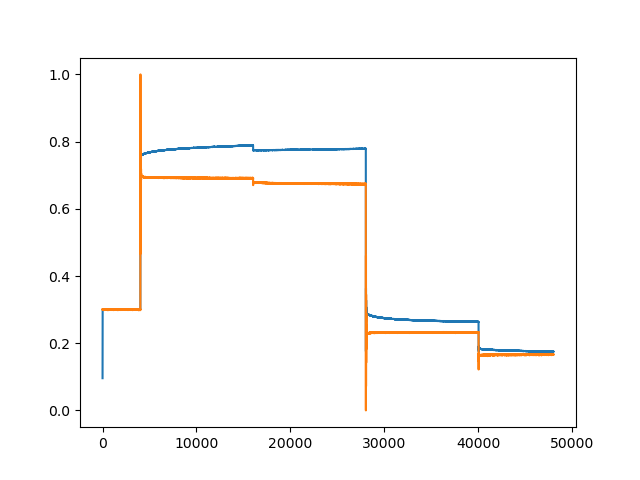

In [5]:
y_hat = torch.zeros_like(u1)
lags = a.initLags()
# Predict whole Dataset
for i in range(len(u1)):
    y_hat[i] = a(lagged_u1[i], lagged_u2[i], lags)
    lags = torch.roll(lags, 1, 0)
    lags[0] = y_hat[i]
plt.plot(y_hat.detach().numpy())
plt.plot(y)
plt.show()